# LendingClub-Random-Forest-Classifier Project

## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).mm

In [2]:
# Loading the data as as Data Frame.
df = pd.read_csv('loan_data.csv')

In [3]:
# Checking the basic info about the data.
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
df['not.fully.paid'] # This is the Target Variable to be classified.

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

## Exploratory Data Analysis

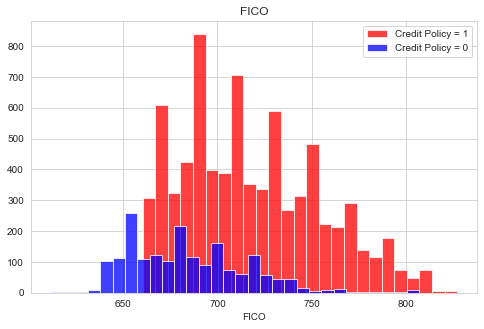

In [8]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
plt.hist(df[df['credit.policy'] == 1]['fico'], bins = 30, color='red', alpha=0.75,label='Credit Policy = 1')
plt.hist(df[df['credit.policy'] == 0]['fico'], bins = 30, color='blue', alpha=0.75,label='Credit Policy = 0')
plt.title('FICO')
plt.legend()
plt.xlabel('FICO')
plt.show()

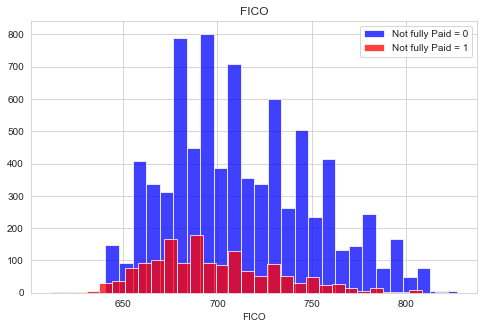

In [9]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
plt.hist(df[df['not.fully.paid'] == 0]['fico'], bins = 30, color='blue', alpha=0.75,label='Not fully Paid = 0')
plt.hist(df[df['not.fully.paid'] == 1]['fico'], bins = 30, color='red', alpha=0.75,label='Not fully Paid = 1')
plt.title('FICO')
plt.legend()
plt.xlabel('FICO')
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

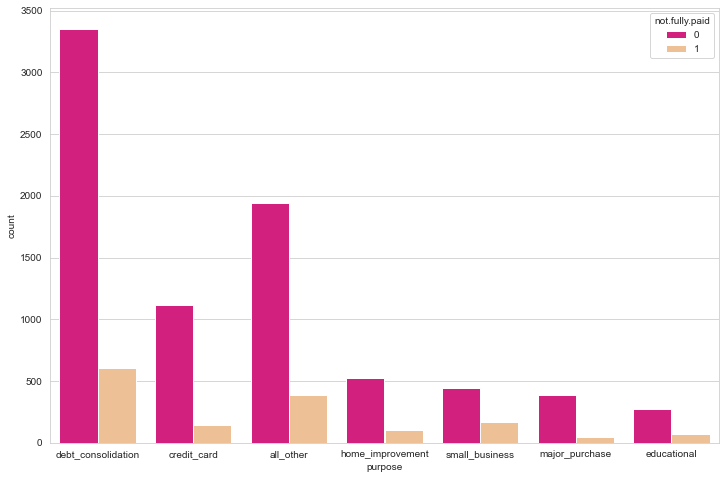

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df['purpose'], hue = df["not.fully.paid"],palette="Accent_r")

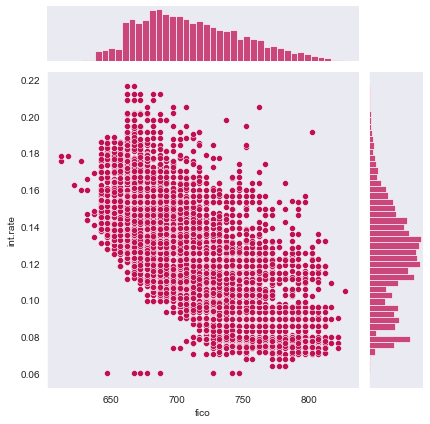

In [11]:
sns.set_style('dark')
sns.jointplot(x = df['fico'], y = df['int.rate'], color = '#be1053')

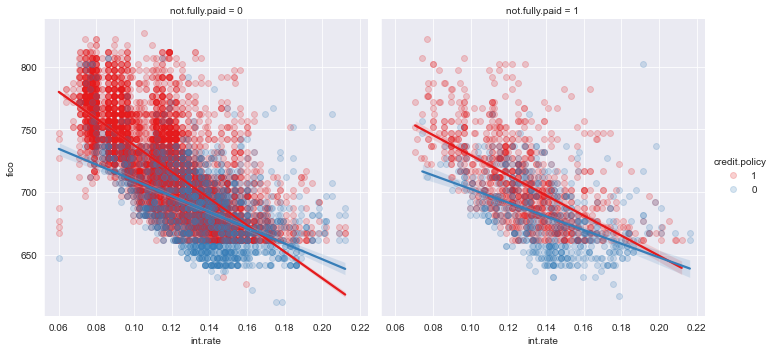

In [12]:
sns.set_style('darkgrid')
sns.lmplot(y = 'fico', x = 'int.rate',data = df, col = 'not.fully.paid', 
           hue = 'credit.policy', palette = 'Set1', scatter_kws = dict(alpha=0.2), hue_order=[1,0])

## Feature engineering

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [15]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [16]:
encoder = LabelEncoder()
df['purpose'] = encoder.fit_transform(df['purpose'])

In [17]:
dum = pd.get_dummies(df['purpose'])

In [18]:
df.drop('purpose', axis = 1, inplace = True)
df = pd.concat([df, dum], axis = 1)
df

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  0  1  2  3  4  5  6  
0           0               0  0  0  1  0  0  0  0  
1           0               0  0  1  0  0  0  0  0  
2           0               0  0  0  1  0  0  0  0  
3           0               0  0  0  1  0  0  0  0  
4           0               0  0  1  0  0  0  0  0  
...       ...             ... .. .. .. .. .. .. ..  
9573        0               1  1  0  0  0  0  0  0  
9574        0               1  1  0  0  0  0  0  0  
9575        0               1  0  0  1  0  0  0  0  
9576        0               1  0  0  0  0  1  0  0  
9577        0               1  0  0  1  0  0  0  0  

[9578 rows x 20 columns]

In [19]:
features = df.drop('not.fully.paid', axis = 1)
df_features = features.columns
scaler = StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns =df_features)
features

credit.policy  int.rate  installment  log.annual.inc       dti  \
0          0.492222 -0.139318     2.463099        0.680388  0.998505   
1          0.492222 -0.578868    -0.438854        0.244031  0.244540   
2          0.492222  0.486484     0.230708       -0.908659 -0.141885   
3          0.492222 -0.813544    -0.757022        0.680388 -0.654697   
4          0.492222  0.743509    -1.043992        0.597961  0.343326   
...             ...       ...          ...             ...       ...   
9573      -2.031603  0.873884     0.123976        2.031030 -0.322023   
9574      -2.031603  0.099083    -0.296481        0.341170 -1.800898   
9575      -2.031603 -0.578868    -1.068670       -0.545694  0.070213   
9576      -2.031603  1.391660     0.156914       -0.182730  0.954924   
9577      -2.031603  0.616859     2.580601        0.540594  0.533633   

          fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0     0.688825           0.432230   0.353732    0.182704       -0.716989   
1    -0.101303          -0.721230   0.495018    1.030602       -0.716989   
2    -0.759742           0.059770  -0.397073   -0.730683       -0.262470   
3     0.030385          -0.745277   0.496321    0.909966       -0.262470   
4    -1.154806          -0.198161  -0.360663   -0.251586       -0.716989   
...        ...                ...        ...         ...             ...   
9573 -1.023118           2.368325   5.879467    1.216726        0.192048   
9574  0.293761          -0.072400  -0.495638   -1.575135        1.555604   
9575 -0.628054          -0.444860  -0.203765    1.244300        2.919159   
9576 -0.496366          -1.105722  -0.501089   -1.502753        1.555604   
9577  0.557137           0.071785   0.621105    0.351594        2.010122   

      delinq.2yrs   pub.rec         0         1         2         3         4  \
0       -0.299730 -0.237003 -0.567142 -0.389558  1.191856 -0.192721 -0.265117   
1       -0.299730 -0.237003 -0.567142  2.567010 -0.839028 -0.192721 -0.265117   
2       -0.299730 -0.237003 -0.567142 -0.389558  1.191856 -0.192721 -0.265117   
3       -0.299730 -0.237003 -0.567142 -0.389558  1.191856 -0.192721 -0.265117   
4        1.531147 -0.237003 -0.567142  2.567010 -0.839028 -0.192721 -0.265117   
...           ...       ...       ...       ...       ...       ...       ...   
9573    -0.299730 -0.237003  1.763226 -0.389558 -0.839028 -0.192721 -0.265117   
9574    -0.299730 -0.237003  1.763226 -0.389558 -0.839028 -0.192721 -0.265117   
9575    -0.299730 -0.237003 -0.567142 -0.389558  1.191856 -0.192721 -0.265117   
9576    -0.299730 -0.237003 -0.567142 -0.389558 -0.839028 -0.192721  3.771915   
9577    -0.299730 -0.237003 -0.567142 -0.389558  1.191856 -0.192721 -0.265117   

             5         6  
0    -0.218647 -0.262855  
1    -0.218647 -0.262855  
2    -0.218647 -0.262855  
3    -0.218647 -0.262855  
4    -0.218647 -0.262855  
...        ...       ...  
9573 -0.218647 -0.262855  
9574 -0.218647 -0.262855  
9575 -0.218647 -0.262855  
9576 -0.218647 -0.262855  
9577 -0.218647 -0.262855  

[9578 rows x 19 columns]

In [20]:
y = df['not.fully.paid']
X = features

## Model Building

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Decision Tree Classifier

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
d_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, d_pred))
print('\n')
print(classification_report(y_test, d_pred))
print('Decision Tree Accuracy: ', accuracy_score(y_test, d_pred))

[[2010  398]
 [ 365  101]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.74      0.73      0.74      2874

Decision Tree Accuracy:  0.7345163535142658


# Random Forest Classifier

In [47]:
dtc = RandomForestClassifier(n_estimators=600)
dtc.fit(X_train, y_train)
r_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, d_pred))
print('\n')
print(classification_report(y_test, d_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, d_pred))

[[2010  398]
 [ 365  101]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.74      0.73      0.74      2874

Random Forest Accuracy:  0.7345163535142658
